In [3]:
import os
from torchvision.datasets import CocoDetection
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader
import numpy as np



In [4]:
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_built() and torch.backends.mps.is_available():
    device = torch.device("mps")
print(device)

mps


In [5]:
#RAHHH I LOVE TUTORIALS: https://docs.pytorch.org/tutorials/intermediate/torchvision_tutorial.html (thanks for the guide)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=2)

/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from helper import customCoco
from helper import collate

transform = transforms.Compose([
    transforms.ToTensor(),
])
    
X_train = "../data/license_plates/train/images"
y_train = "../data/license_plates/train/annotations.json"

train_dataset = customCoco(root=X_train, annFile=y_train, transform=transform)
#for the next one, try to make collate_fn work somehow so i can keep origional image size but its just not working for now
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2, collate_fn=collate)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [11]:
model.to(device)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 10
for epoch in range(epochs):

    running_loss = 0.0
    i = 0
    for images, targets in train_loader:
        # move each image tensor
        images = [img.to(device) for img in images]

        # move only the tensor fields in each target dict
        for t in targets:
            t['boxes']     = t['boxes'].to(device)
            t['labels']    = t['labels'].to(device)
            # if you added these:
            t['image_id']  = t['image_id'].to(device)
            t['area']      = t['area'].to(device)
            t['iscrowd']   = t['iscrowd'].to(device)

        # forward + compute loss
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        # backward + optimizer step
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        running_loss += loss_dict.item()
        i += 1
        if i % 2000 == 1999:
            print(f'[{epoch + 1}/{epochs}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/data/_utils/worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/Users/samb/Documents/code/ML-projects/24/helper.py", line 10, in __getitem__
    img, anns = super().__getitem__(item)
                ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/datasets/coco.py", line 57, in __getitem__
    image, target = self.transforms(image, target)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Compose.__call__() takes 2 positional arguments but 3 were given


[{'id': 0, 'image_id': 0, 'category_id': 1, 'bbox': [222, 214, 98, 32], 'area': 3136, 'segmentation': [], 'iscrowd': 0}]


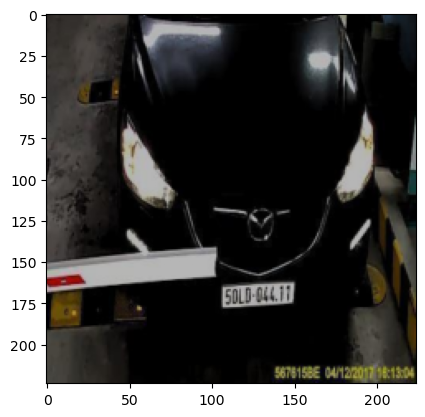

tensor([[[[0.5137, 0.5137, 0.5216,  ..., 0.3922, 0.3961, 0.4157],
          [0.5137, 0.5137, 0.5216,  ..., 0.4000, 0.4039, 0.4157],
          [0.5137, 0.5137, 0.5216,  ..., 0.4118, 0.4078, 0.4157],
          ...,
          [0.7843, 0.7725, 0.7255,  ..., 0.7176, 0.6745, 0.6588],
          [0.7843, 0.7686, 0.7216,  ..., 0.6745, 0.6667, 0.6431],
          [0.7843, 0.7686, 0.7176,  ..., 0.6667, 0.6549, 0.6353]],

         [[0.5294, 0.5294, 0.5373,  ..., 0.3882, 0.3922, 0.4118],
          [0.5294, 0.5294, 0.5373,  ..., 0.3961, 0.4000, 0.4118],
          [0.5294, 0.5294, 0.5373,  ..., 0.4078, 0.4039, 0.4118],
          ...,
          [0.7255, 0.7216, 0.6902,  ..., 0.7412, 0.6706, 0.6549],
          [0.7255, 0.7216, 0.6824,  ..., 0.7020, 0.6784, 0.6549],
          [0.7294, 0.7216, 0.6784,  ..., 0.6980, 0.6824, 0.6588]],

         [[0.5725, 0.5725, 0.5804,  ..., 0.4118, 0.4157, 0.4353],
          [0.5725, 0.5725, 0.5804,  ..., 0.4196, 0.4235, 0.4353],
          [0.5725, 0.5725, 0.5804,  ..., 0

In [ ]:
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img, target = train_dataset[0]

fig, ax = plt.subplots(1)
ax.imshow(img.permute(1, 2, 0))  # Convert from [C,H,W] to [H,W,C]
print(target)

plt.show()
img, target = next(iter(train_loader))
print(img, target)'''